In [1]:
import pandas as pd

In [2]:
cardata=pd.read_csv("car data with some Modification.csv")

In [3]:
cardata.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Relation b/w engin size and price

In [4]:
import seaborn as srn

<AxesSubplot:xlabel='engine-size', ylabel='price'>

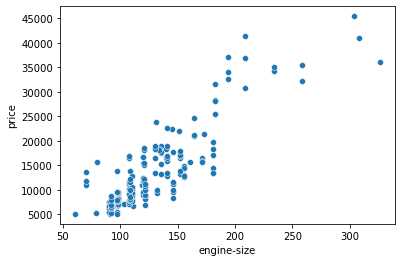

In [7]:
plt=srn.scatterplot(x="engine-size",y="price",data=cardata)
plt

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x=cardata[["engine-size"]]
y=cardata[["price"]]

## by train_test_split we split the data for training(calculating y for x) and for testing(to test the data we obtain is matching with previous data)

### test_size=0.3 means data use for traning is 70%
### and data use for testing is 30%
#### the more data we use for traing more acurate result we get

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
x_train.head()

,engine-size
129,121
84,110
168,146
43,119
34,92


## Now import Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

## to predict y value from x_test value

In [18]:
y_pred=lr.predict(x_test)

In [21]:
y_pred[0:5]

array([[22717.38725408],
       [17525.9056468 ],
       [13587.54028955],
       [ 6784.90921793],
       [ 2846.54386068]])

## Now check predicted value of y by actual value

In [23]:
y_test.head()

,price
101,17199
107,13860
195,18950
30,6855
54,13645


## finding the error in predicted value

In [25]:
from sklearn.metrics import mean_squared_error as mean_error

In [27]:
mean_squared_error(y_test,y_pred)

21212530.918043725

### By this large error it can be conclude that as we try to find relationship b/w engin_size and price is not valid

# Finding Relation b/w price,engin_size,horsepower,city_mgh

In [43]:
y=cardata[["price"]]
x=cardata[["engine-size","horsepower","city-mpg"]]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [46]:
x_test.head()

,engine-size,horsepower,city-mpg
158,98,70.0,28
32,92,76.0,30
188,97,68.0,33
159,98,70.0,29
68,234,155.0,16


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr1=LinearRegression()

In [49]:
lr1.fit(x_train,y_train)

LinearRegression()

## As Hoursepower column contain some plank columns so change them by average value or drop that row

In [41]:
cardata.dropna(subset=['horsepower'],axis=0,inplace=True)

In [50]:
y_pred=lr1.predict(x_test)

In [52]:
y_pred[0:5]

array([[ 7815.05497415],
       [ 6947.85389518],
       [ 6687.48471638],
       [ 7629.43151099],
       [29887.98251266]])

In [53]:
y_test.head()

,price
158,9258
32,6529
188,13845
159,8058
68,34184


In [54]:
mean_squared_error(y_test,y_pred)

12296915.625504265

## As the error in this is less then previous one so this traing is more accurate then linear regression of one variable so it is Good